Mini Project 2
Alexander Winberg

---



In [1]:
#We start by importing the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline

import csv
import pandas as pd 

import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier

import matplotlib.image as pltimg


import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from six import StringIO

from IPython.display import Image
import pydotplus
import graphviz

# Set random seed
np.random.seed(0)

from google.colab import drive
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Upload the csv file (it only works with the correct csv file that should be labeled datasets_dataset.csv)
from google.colab import files
uploaded = files.upload()

Saving datasets_dataset.csv to datasets_dataset.csv


In [3]:
#reading csv file and naming it df
df = pd.read_csv("datasets_dataset.csv")

#just a print function to check that the data is imported correctly, it can be removed if you trust that the files has been uploaded.
print(df) 

             ID  Week2_Quiz1  Week3_MP1  ...  Week9_Stat2  Week9_Stat3  Grade
0     ML-2020-1         5.00       15.0  ...            1            0      4
1     ML-2020-2         3.33       15.0  ...            2            5      4
2     ML-2020-3         1.67       13.0  ...            1            0      3
3     ML-2020-4         2.50       14.0  ...            0            0      3
4     ML-2020-6         0.00       15.0  ...            1            0      2
..          ...          ...        ...  ...          ...          ...    ...
102  ML-2020-60         0.00        0.0  ...            0            0      0
103  ML-2020-58         0.00        0.0  ...            0            0      0
104  ML-2020-94         0.00        0.0  ...            0            0      0
105   ML-2020-9         0.00        0.0  ...            0            0      0
106  ML-2020-86         0.00        0.0  ...            0            0      0

[107 rows x 48 columns]


In [4]:
#checking if any values equal null
df.isnull().sum()

ID             0
Week2_Quiz1    0
Week3_MP1      0
Week3_PR1      0
Week5_MP2      0
Week5_PR2      0
Week7_MP3      0
Week7_PR3      0
Week4_Quiz2    0
Week6_Quiz3    0
Week8_Total    0
Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
Grade          0
dtype: int64

In [5]:
#dropping Week8_Total, because we were told not to use it
df.pop('Week8_Total')
#checking drop
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2


Making Decision trees 

Making a decisin tree over all the grade affecting parts

In [6]:
#now we combine all the quizes, miniprojects and peer reviews into the features variable
features = ['Week2_Quiz1','Week4_Quiz2','Week6_Quiz3','Week3_MP1','Week3_PR1','Week5_MP2','Week5_PR2','Week7_MP3','Week7_PR3']

a = df[features]
b = df['Grade']
 

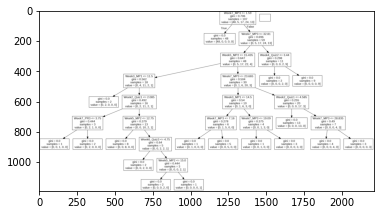

In [7]:
# We make a new decision tree that combines all the data in features
dtree = DecisionTreeClassifier()
dtree = dtree.fit(a, b)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')

img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show() 

Making a decision tree over all status 2

In [8]:
#making a decision tree based upon all the stat 2 data, the data related to grading
status = ['Week1_Stat2','Week2_Stat2','Week3_Stat2','Week4_Stat2','Week5_Stat2','Week6_Stat2','Week7_Stat2','Week8_Stat2','Week9_Stat2']

a = df[status]
b = df['Grade']


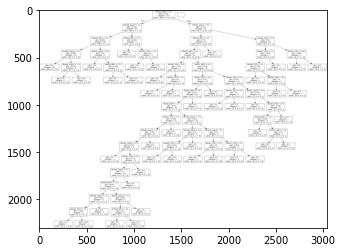

In [9]:
#and then we make a new decision tree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(a, b)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree3.png')

img=pltimg.imread('mydecisiontree3.png')
imgplot = plt.imshow(img)
plt.show()

The random forest classifier

In [10]:
#Randomly separating the training and testing data, so that .95 is training data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .95

# View the top 5 rows
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,is_train
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4,True
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4,True
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3,True
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3,True
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2,True


In [11]:
# Create two dataframes, one with the training rowsand the other with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [12]:
# Show the number of observations for the two testing and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 101
Number of observations in the test data: 6


In [13]:
# Create a list consiting of all the stat2 columns' names
status = ['Week1_Stat2','Week2_Stat2','Week3_Stat2','Week4_Stat2','Week5_Stat2','Week6_Stat2','Week7_Stat2','Week8_Stat2','Week9_Stat2']


In [14]:
y = train['Grade']

In [15]:
#View training data
print(y)

0      4
1      4
2      3
3      3
4      2
      ..
101    0
103    0
104    0
105    0
106    0
Name: Grade, Length: 101, dtype: int64


In [16]:
# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# Start to train the classifier
clf.fit(train[status], y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [17]:
#Apply the classifier to the test data
clf.predict(test[status])

array([3, 4, 0, 3, 3, 0])

In [18]:
# View the predicted probabilities of the test data
clf.predict_proba(test[status])

array([[0.01  , 0.01  , 0.48  , 0.35  , 0.15  ],
       [0.01  , 0.02  , 0.3   , 0.62  , 0.05  ],
       [0.835 , 0.    , 0.05  , 0.04  , 0.075 ],
       [0.01  , 0.17  , 0.45  , 0.33  , 0.04  ],
       [0.4025, 0.    , 0.5075, 0.06  , 0.03  ],
       [0.325 , 0.    , 0.115 , 0.29  , 0.27  ]])

In [19]:
# saving the prediction to the variable preds
preds = clf.predict(test[status])

In [20]:
preds

array([3, 4, 0, 3, 3, 0])

In [21]:
# View the ACTUAL grades for the test data
test['Grade']

7      5
19     0
51     3
69     3
71     5
102    0
Name: Grade, dtype: int64

In [22]:
#Viewing how the classifier did, the predicted grades should be read top down. the actual grades should be read left to right.  
pd.crosstab(test['Grade'], preds, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Predicted Grades,0,3,4
Actual Grades,,,
0,1,0,1
3,1,1,0
5,0,2,0


A random forest classifier

In [24]:
#Randomly separating the training and testing data, so that 95% is training data. With so little data we need to use almost everything for training.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .95

# View the top 5 rows
df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,Week3_Stat3,Week4_Stat0,Week4_Stat1,Week4_Stat2,Week4_Stat3,Week5_Stat0,Week5_Stat1,Week5_Stat2,Week5_Stat3,Week6_Stat0,Week6_Stat1,Week6_Stat2,Week6_Stat3,Week7_Stat0,Week7_Stat1,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade,is_train
0,ML-2020-1,5.00,15.0,5,16.09,5.00,21.88,5.0,5.00,5.0,0,0,0,0,7,30,1,0,30,4,0,0,14,39,2,0,24,6,1,0,28,30,2,0,2,0,1,0,5,4,0,4,8,6,1,0,4,True
1,ML-2020-2,3.33,15.0,5,17.83,5.00,22.27,5.0,4.00,5.0,8,0,0,0,61,10,3,8,100,4,4,3,130,16,1,4,48,19,5,5,57,22,2,4,31,9,0,8,5,2,0,0,25,3,2,5,4,True
2,ML-2020-3,1.67,13.0,5,15.22,5.00,27.05,2.5,5.00,5.0,4,0,0,0,19,10,3,3,25,4,0,2,50,19,2,2,28,6,0,2,14,20,2,0,12,4,0,0,8,2,0,0,9,0,1,0,3,True
3,ML-2020-4,2.50,14.0,5,10.00,5.00,31.02,5.0,3.13,5.0,12,0,0,1,30,10,1,6,79,4,2,2,240,27,2,1,47,4,3,1,99,19,4,0,29,4,5,4,10,0,0,0,7,6,0,0,3,True
4,ML-2020-6,0.00,15.0,5,12.17,4.93,15.91,5.0,4.67,5.0,6,0,0,0,0,0,0,0,27,5,0,0,6,15,1,0,32,12,0,8,22,18,1,2,43,4,3,6,8,5,1,1,5,3,1,0,2,True


In [25]:
# Create two new dataframes, one with the training rows and one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [26]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 100
Number of observations in the test data: 7


In [27]:
# Create a list of the feature column's names, this time it's the quizzes, peer reviews and miniprojects
features = ['Week2_Quiz1','Week4_Quiz2','Week6_Quiz3','Week3_MP1','Week3_PR1','Week5_MP2','Week5_PR2','Week7_MP3','Week7_PR3']


In [28]:
y = train['Grade']

In [29]:
print(y)

0      4
1      4
2      3
3      3
4      2
      ..
102    0
103    0
104    0
105    0
106    0
Name: Grade, Length: 100, dtype: int64


In [30]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=-1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [31]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
clf.predict(test[features])

array([0, 5, 5, 0, 5, 0, 0])

In [32]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.3 , 0.45],
       [0.  , 0.  , 0.2 , 0.28, 0.52],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.1 , 0.88],
       [1.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  ]])

In [33]:
# Naming it preds, so that it is easier to use
preds = clf.predict(test[features])

In [34]:
# View the ACTUAL grades for the test sample
test['Grade']

10    0
43    5
55    5
58    0
71    5
83    0
84    0
Name: Grade, dtype: int64

In [35]:

preds

array([0, 5, 5, 0, 5, 0, 0])

In [36]:
#Viewing how the classifier did, the predicted grades should be read top down. the actual grades should be read left to right. 
pd.crosstab(test['Grade'], preds, rownames=['Actual Grades'], colnames=['Predicted Grades'])

Predicted Grades,0,5
Actual Grades,,
0,4,0
5,0,3


The secondary method

In [37]:
#just to be sure, we import everything again.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import graphviz

from google.colab import drive
from google.colab import files

In [38]:
#Upload the csv file (it only works with the correct csv file that should be labeled datasets_dataset.csv)
upload = files.upload ()

Saving datasets_dataset.csv to datasets_dataset (1).csv


In [39]:
#save the datasets_dataset to the variable data
data = pd.read_csv("datasets_dataset.csv")


In [40]:
#store all the data into a few categories and drop everything after that, we now have only ID, grade and quiz

data['Quiz']=(data['Week2_Quiz1'] + data['Week4_Quiz2']+ data['Week6_Quiz3'])

data.drop(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis='columns').head()


,ID,Grade,Quiz
0,ML-2020-1,4,15.00
1,ML-2020-2,4,12.33
2,ML-2020-3,3,11.67
3,ML-2020-4,3,10.63
4,ML-2020-6,2,9.67


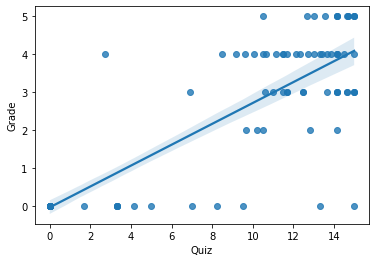

In [41]:
#compare the quizzes and grade and plot a course on them
data= sns.regplot(x='Quiz', y='Grade', data=data)

In [42]:
#we repeat the process

data = pd.read_csv("datasets_dataset.csv")


In [43]:
#we repeat the process


data['Project']=(data['Week3_MP1'] + data['Week5_MP2'] + data['Week7_MP3'])

data.drop(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis='columns').head()


,ID,Grade,Project
0,ML-2020-1,4,52.97
1,ML-2020-2,4,55.10
2,ML-2020-3,3,55.27
3,ML-2020-4,3,55.02
4,ML-2020-6,2,43.08


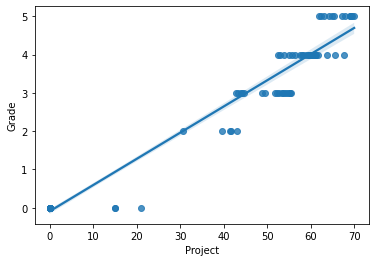

In [44]:
#we compare the mini projects and grade and track a plot
data= sns.regplot(x='Project', y='Grade', data=data)

In [45]:
#we repeat the process
data = pd.read_csv("datasets_dataset.csv")


In [46]:
#we repeat the process

data['Peer Review']=(data['Week3_PR1'] + data['Week5_PR2'] + data['Week7_PR3'])
data.drop(['Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis='columns').head()


,ID,Grade,Peer Review
0,ML-2020-1,4,15.00
1,ML-2020-2,4,15.00
2,ML-2020-3,3,12.50
3,ML-2020-4,3,15.00
4,ML-2020-6,2,14.93


In [49]:
#we compare the peer reviews with the grade and track a plot.
data= sns.regplot(x='Peer Review', y='Grade', data=data)

TypeError: ignored

In [50]:
#we repeat the process
data = pd.read_csv("datasets_dataset.csv")

In [53]:
#store all the data into one category and drop everything after that, we now have only ID, grade, quiz, project and peer review


data['Quiz']=(data['Week2_Quiz1'] + data['Week4_Quiz2']+ data['Week6_Quiz3'])
data['Project']=(data['Week3_MP1'] + data['Week5_MP2'] + data['Week7_MP3'])
data['Peer Review']=(data['Week3_PR1'] + data['Week5_PR2'] + data['Week7_PR3'])
data['Total']=(data['Quiz'] + data['Project']+ data['Peer Review'])
data.drop(['Quiz', 'Project', 'Peer Review', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2', 'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total', 'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3', 'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3', 'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3', 'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3', 'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3', 'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3', 'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3', 'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3', 'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3'], axis='columns').head()


TypeError: ignored

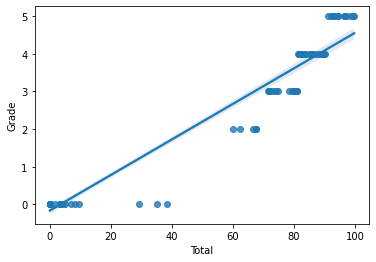

In [52]:
#we compare the combined score with the grade and track a plot.
data= sns.regplot(x='Total', y='Grade', data=data)